# KDE Plot

[Kim Fessel] [https://www.youtube.com/watch?v=DCgPRaIDYXA]
- Used to gauge Distribution  
- KDE - Kernel Density Estimation  
- helps estimate the probability density function  
- also rugplot, displot, histplot, jointplot
- here we assume that there is no underlying distribution (non parametric way)... eg. we are not assuming that the data comes from normal/gaussian distribution, so we dont have a mean, median or stddev to fit

##### How does KDE work?

- a kernel is built around each individual datapoint of a finite set which when put together will build up to a probability density function
- the individual kernels can be any distribution as long as we have ample data
- default is gaussian

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
cars = sns.load_dataset('mpg')

In [5]:
cars.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite


In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [7]:
cars.dropna(how = 'any', inplace=True)

In [8]:
cars.shape

(392, 9)

In [9]:
cars[:5]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


### Univariate KDE plot

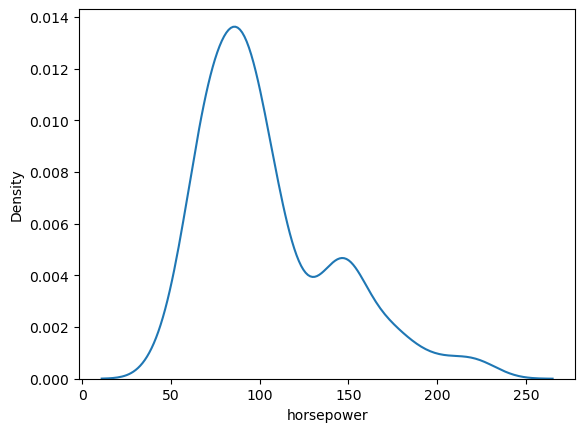

In [13]:
sns.kdeplot(cars.horsepower);

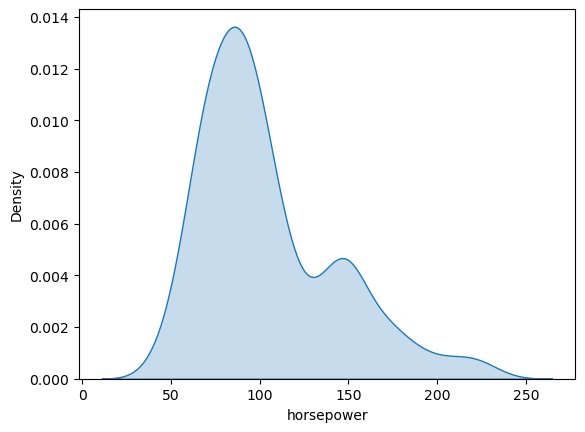

In [14]:
sns.kdeplot(cars.horsepower, shade=True);

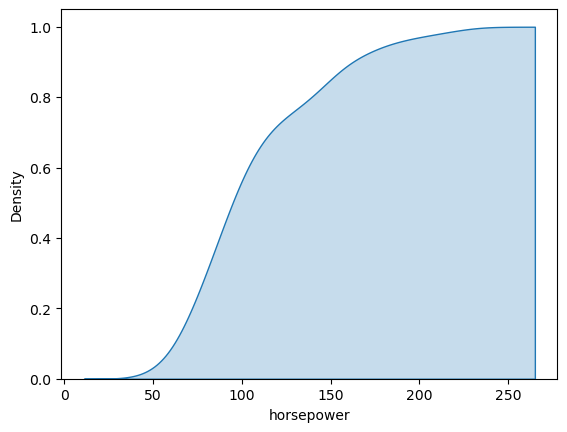

In [26]:
sns.kdeplot(cars.horsepower, shade=True, cumulative=True);
#cumulative distribution function CDF as compared to PDF (probab density func)

bw is the bandwidth parameter - higher means more smooth peaks (can see modes smoothening)  
bw_method - silverman, scott

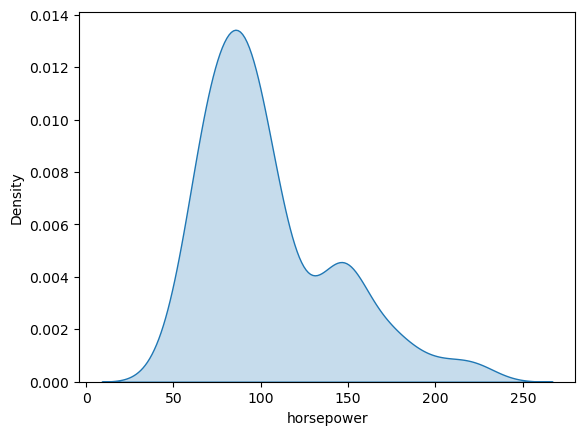

In [27]:
sns.kdeplot(cars.horsepower, shade=True, bw_method='silverman');

### Bi-Variate

/Users/sammy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


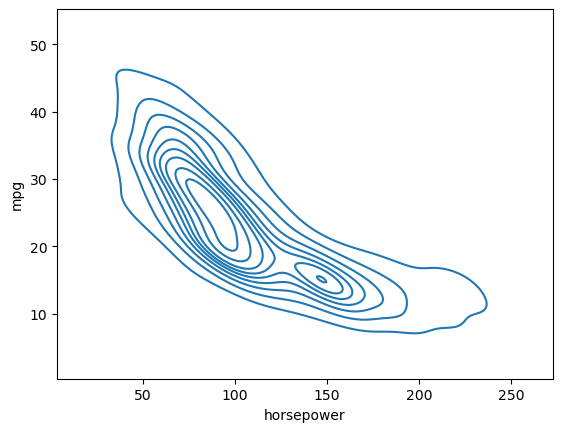

In [29]:
sns.kdeplot(cars.horsepower, cars.mpg);

/Users/sammy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


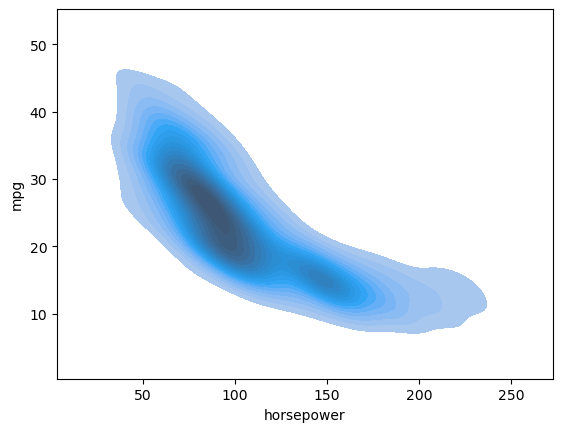

In [31]:
sns.kdeplot(cars.horsepower, cars.mpg, shade=True, n_levels=20);

/Users/sammy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/sammy/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0`, but please update your code.
  warnings.warn(msg, UserWarning)


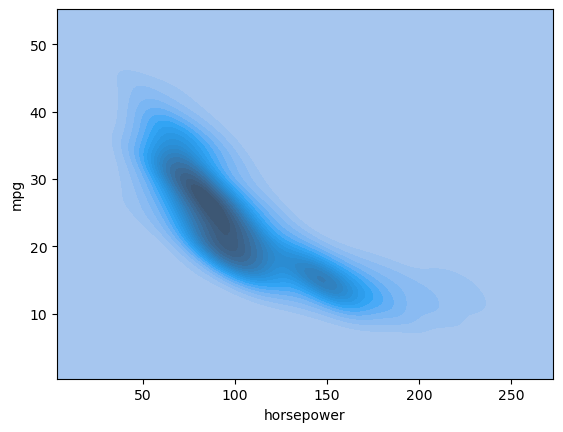

In [32]:
sns.kdeplot(cars.horsepower, cars.mpg, shade=True, n_levels=20, shade_lowest=True);

/Users/sammy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/sammy/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


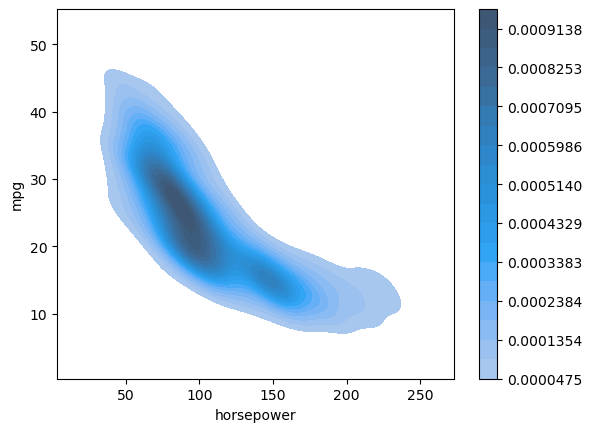

In [33]:
sns.kdeplot(cars.horsepower, cars.mpg, shade=True, n_levels=20, 
            shade_lowest=False, cbar=True);

/Users/sammy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/sammy/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


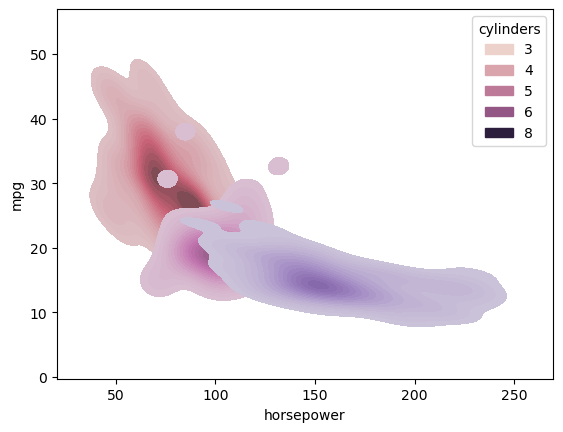

In [37]:
sns.kdeplot(cars.horsepower, cars.mpg, shade=True, n_levels=20, 
            shade_lowest=False, cbar=False, hue=cars.cylinders);

In [38]:
cars.cylinders.value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

In [39]:
cyl_4 = cars.query('cylinders == 4')
cyl_8 = cars.query('cylinders == 8')

Text(0.5, 1.0, 'density plot')

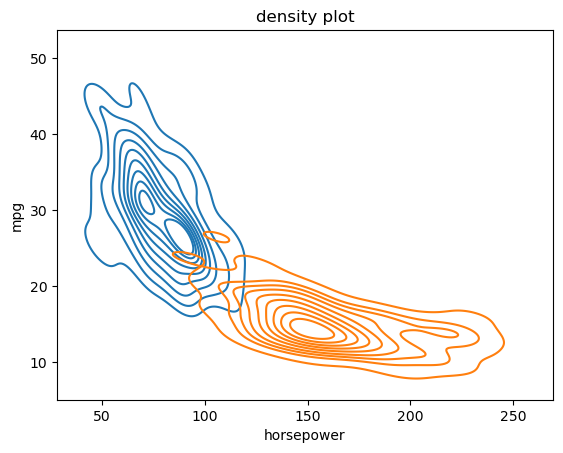

In [43]:
sns.kdeplot(x=cyl_4.horsepower, y=cyl_4.mpg, shade=False)
sns.kdeplot(x=cyl_8.horsepower, y=cyl_8.mpg, shade=False)
plt.title('density plot')